<a href="https://colab.research.google.com/github/kavyalakshmiAR/BDA-/blob/main/Healthcare_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install minisom

In [44]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (4).json


{'kaggle (4).json': b'{"username":"cyberwarriyo","key":"59da4fa34fc1af3ed483c2143998be05"}'}

In [45]:
!chmod 600 /content/kaggle.json

In [46]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

In [49]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [52]:
df = pd.read_csv('data.csv')
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [53]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [54]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)
df_normalized['diagnosis'] = y.values
print(df_normalized.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0             

In [55]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
som_dim = 7
som = MiniSom(som_dim, som_dim, X_normalized.shape[1], sigma=0.5, learning_rate=0.5)
som.random_weights_init(X_normalized)
num_epochs = 100
som.train(X_normalized, num_epochs)

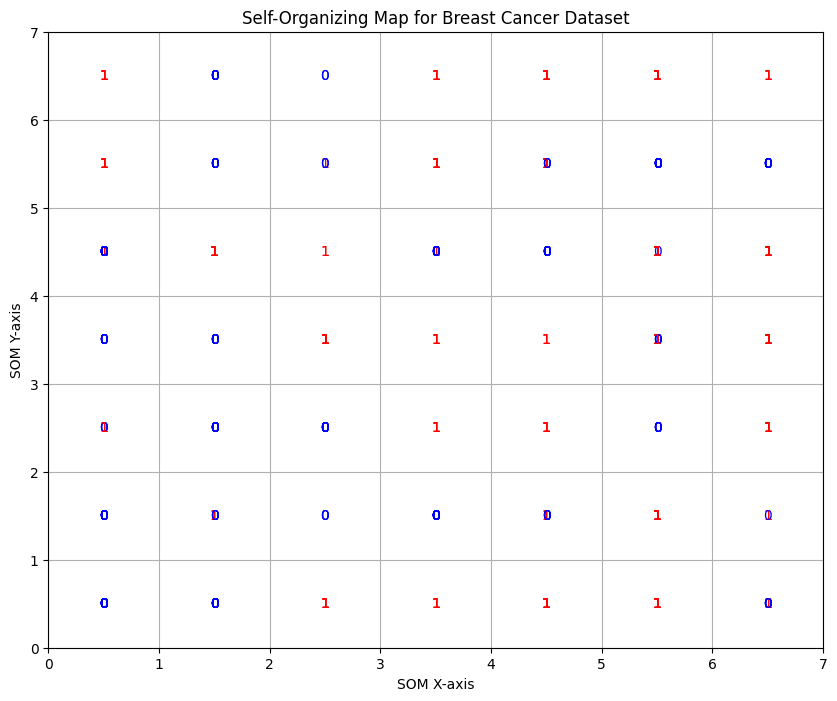

In [56]:
plt.figure(figsize=(10, 8))
for i in range(len(X_normalized)):
    w = som.winner(X_normalized[i])
    plt.text(w[0] + 0.5, w[1] + 0.5, str(int(y.iloc[i])),
             color='red' if y.iloc[i] == 1 else 'blue',
             fontsize=10, ha='center', va='center')

plt.xlim(0, som_dim)
plt.ylim(0, som_dim)
plt.title('Self-Organizing Map for Breast Cancer Dataset')
plt.xlabel('SOM X-axis')
plt.ylabel('SOM Y-axis')
plt.grid()
plt.show()

In [57]:
clusters = {}
for i in range(som_dim):
    for j in range(som_dim):
        clusters[(i, j)] = []
for i in range(len(X_normalized)):
    w = som.winner(X_normalized[i])
    clusters[w].append(y.iloc[i])
node_counts = {}
for node, values in clusters.items():
    malignant_count = values.count(1)
    benign_count = values.count(0)
    node_counts[node] = (malignant_count, benign_count)
for node, counts in node_counts.items():
    print(f'Node {node}: Malignant = {counts[0]}, Benign = {counts[1]}')

Node (0, 0): Malignant = 0, Benign = 43
Node (0, 1): Malignant = 0, Benign = 17
Node (0, 2): Malignant = 2, Benign = 3
Node (0, 3): Malignant = 0, Benign = 9
Node (0, 4): Malignant = 2, Benign = 66
Node (0, 5): Malignant = 7, Benign = 0
Node (0, 6): Malignant = 5, Benign = 0
Node (1, 0): Malignant = 0, Benign = 15
Node (1, 1): Malignant = 2, Benign = 4
Node (1, 2): Malignant = 0, Benign = 21
Node (1, 3): Malignant = 0, Benign = 11
Node (1, 4): Malignant = 8, Benign = 0
Node (1, 5): Malignant = 0, Benign = 9
Node (1, 6): Malignant = 0, Benign = 9
Node (2, 0): Malignant = 6, Benign = 0
Node (2, 1): Malignant = 0, Benign = 3
Node (2, 2): Malignant = 0, Benign = 12
Node (2, 3): Malignant = 13, Benign = 0
Node (2, 4): Malignant = 2, Benign = 0
Node (2, 5): Malignant = 1, Benign = 2
Node (2, 6): Malignant = 0, Benign = 2
Node (3, 0): Malignant = 5, Benign = 0
Node (3, 1): Malignant = 0, Benign = 33
Node (3, 2): Malignant = 4, Benign = 0
Node (3, 3): Malignant = 4, Benign = 0
Node (3, 4): Mal

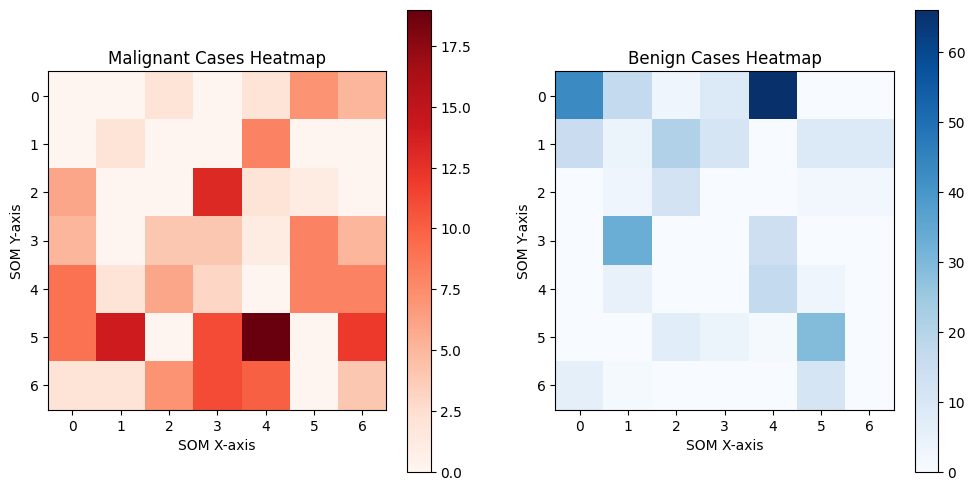

In [58]:
heatmap_data = np.zeros((som_dim, som_dim, 2))
for node, counts in node_counts.items():
    heatmap_data[node[0], node[1], 0] = counts[0]
    heatmap_data[node[0], node[1], 1] = counts[1]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(heatmap_data[:, :, 0], cmap='Reds', alpha=0.7)
ax[0].set_title('Malignant Cases Heatmap')
ax[0].set_xlabel('SOM X-axis')
ax[0].set_ylabel('SOM Y-axis')
ax[0].set_xticks(range(som_dim))
ax[0].set_yticks(range(som_dim))
ax[1].imshow(heatmap_data[:, :, 1], cmap='Blues', alpha=0.7)
ax[1].set_title('Benign Cases Heatmap')
ax[1].set_xlabel('SOM X-axis')
ax[1].set_ylabel('SOM Y-axis')
ax[1].set_xticks(range(som_dim))
ax[1].set_yticks(range(som_dim))
plt.colorbar(ax[0].imshow(heatmap_data[:, :, 0], cmap='Reds'), ax=ax[0])
plt.colorbar(ax[1].imshow(heatmap_data[:, :, 1], cmap='Blues'), ax=ax[1])
plt.show()

In [59]:
som_output = np.zeros((len(X_normalized), 2))
for i in range(len(X_normalized)):
    som_output[i] = som.winner(X_normalized[i])
som_df = pd.DataFrame(som_output, columns=['SOM_X', 'SOM_Y'])
som_df['diagnosis'] = y.values
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(som_df[['SOM_X', 'SOM_Y']], som_df['diagnosis'], test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[104   4]
 [  2  61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

